# World Happiness Report

## The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th.


![World Happiness](https://cdn2.hubspot.net/hubfs/2388156/Imported_Blog_Media/The-World-Happiness-Report-4.jpg)

### This dataset shows the happiest countries on earth.
### In this project we need to predict the happiness score considering all the other factors mentioned in the dataset. 

## Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import zscore


import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset and Data Information

In [75]:
# load dataset

whr = pd.read_csv("happiness_score_dataset.csv")

#first five rows of the dataset
whr.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Happiness Rank column dosent seem to be of importance

In [76]:
# Shape of dataset

whr.shape

(158, 12)

#### There are 158 rows and 12 coloumns in our dataset

In [77]:
# data information

whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

####  - Our dataset has no missing values
####  - All the columns have numerical data except for Country and Region column

## Data Visualisation

<AxesSubplot:>

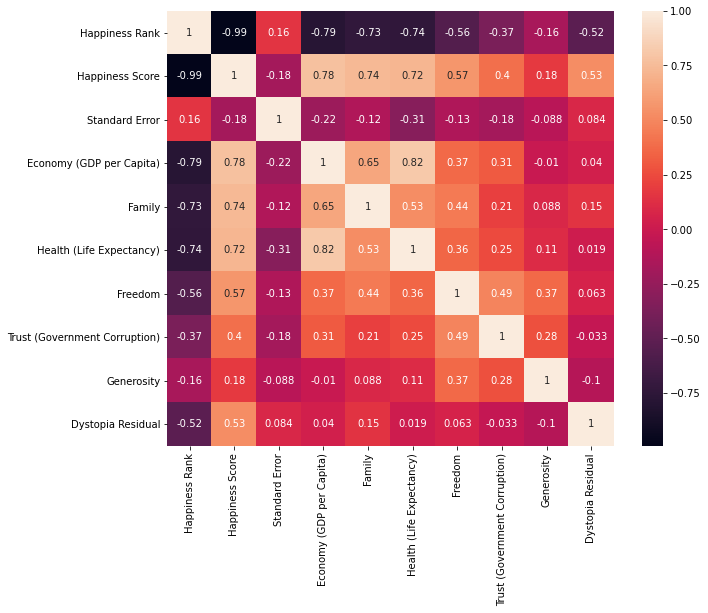

In [78]:
# Heat Map to visualize correlation among the features and label
plt.figure(figsize=(10,8))
sns.heatmap(whr.corr(),annot=True)

#### Happiness Score show a strong correlation between Economy,Family,Health and Dystopia while a negative correlation with Happiness Rank

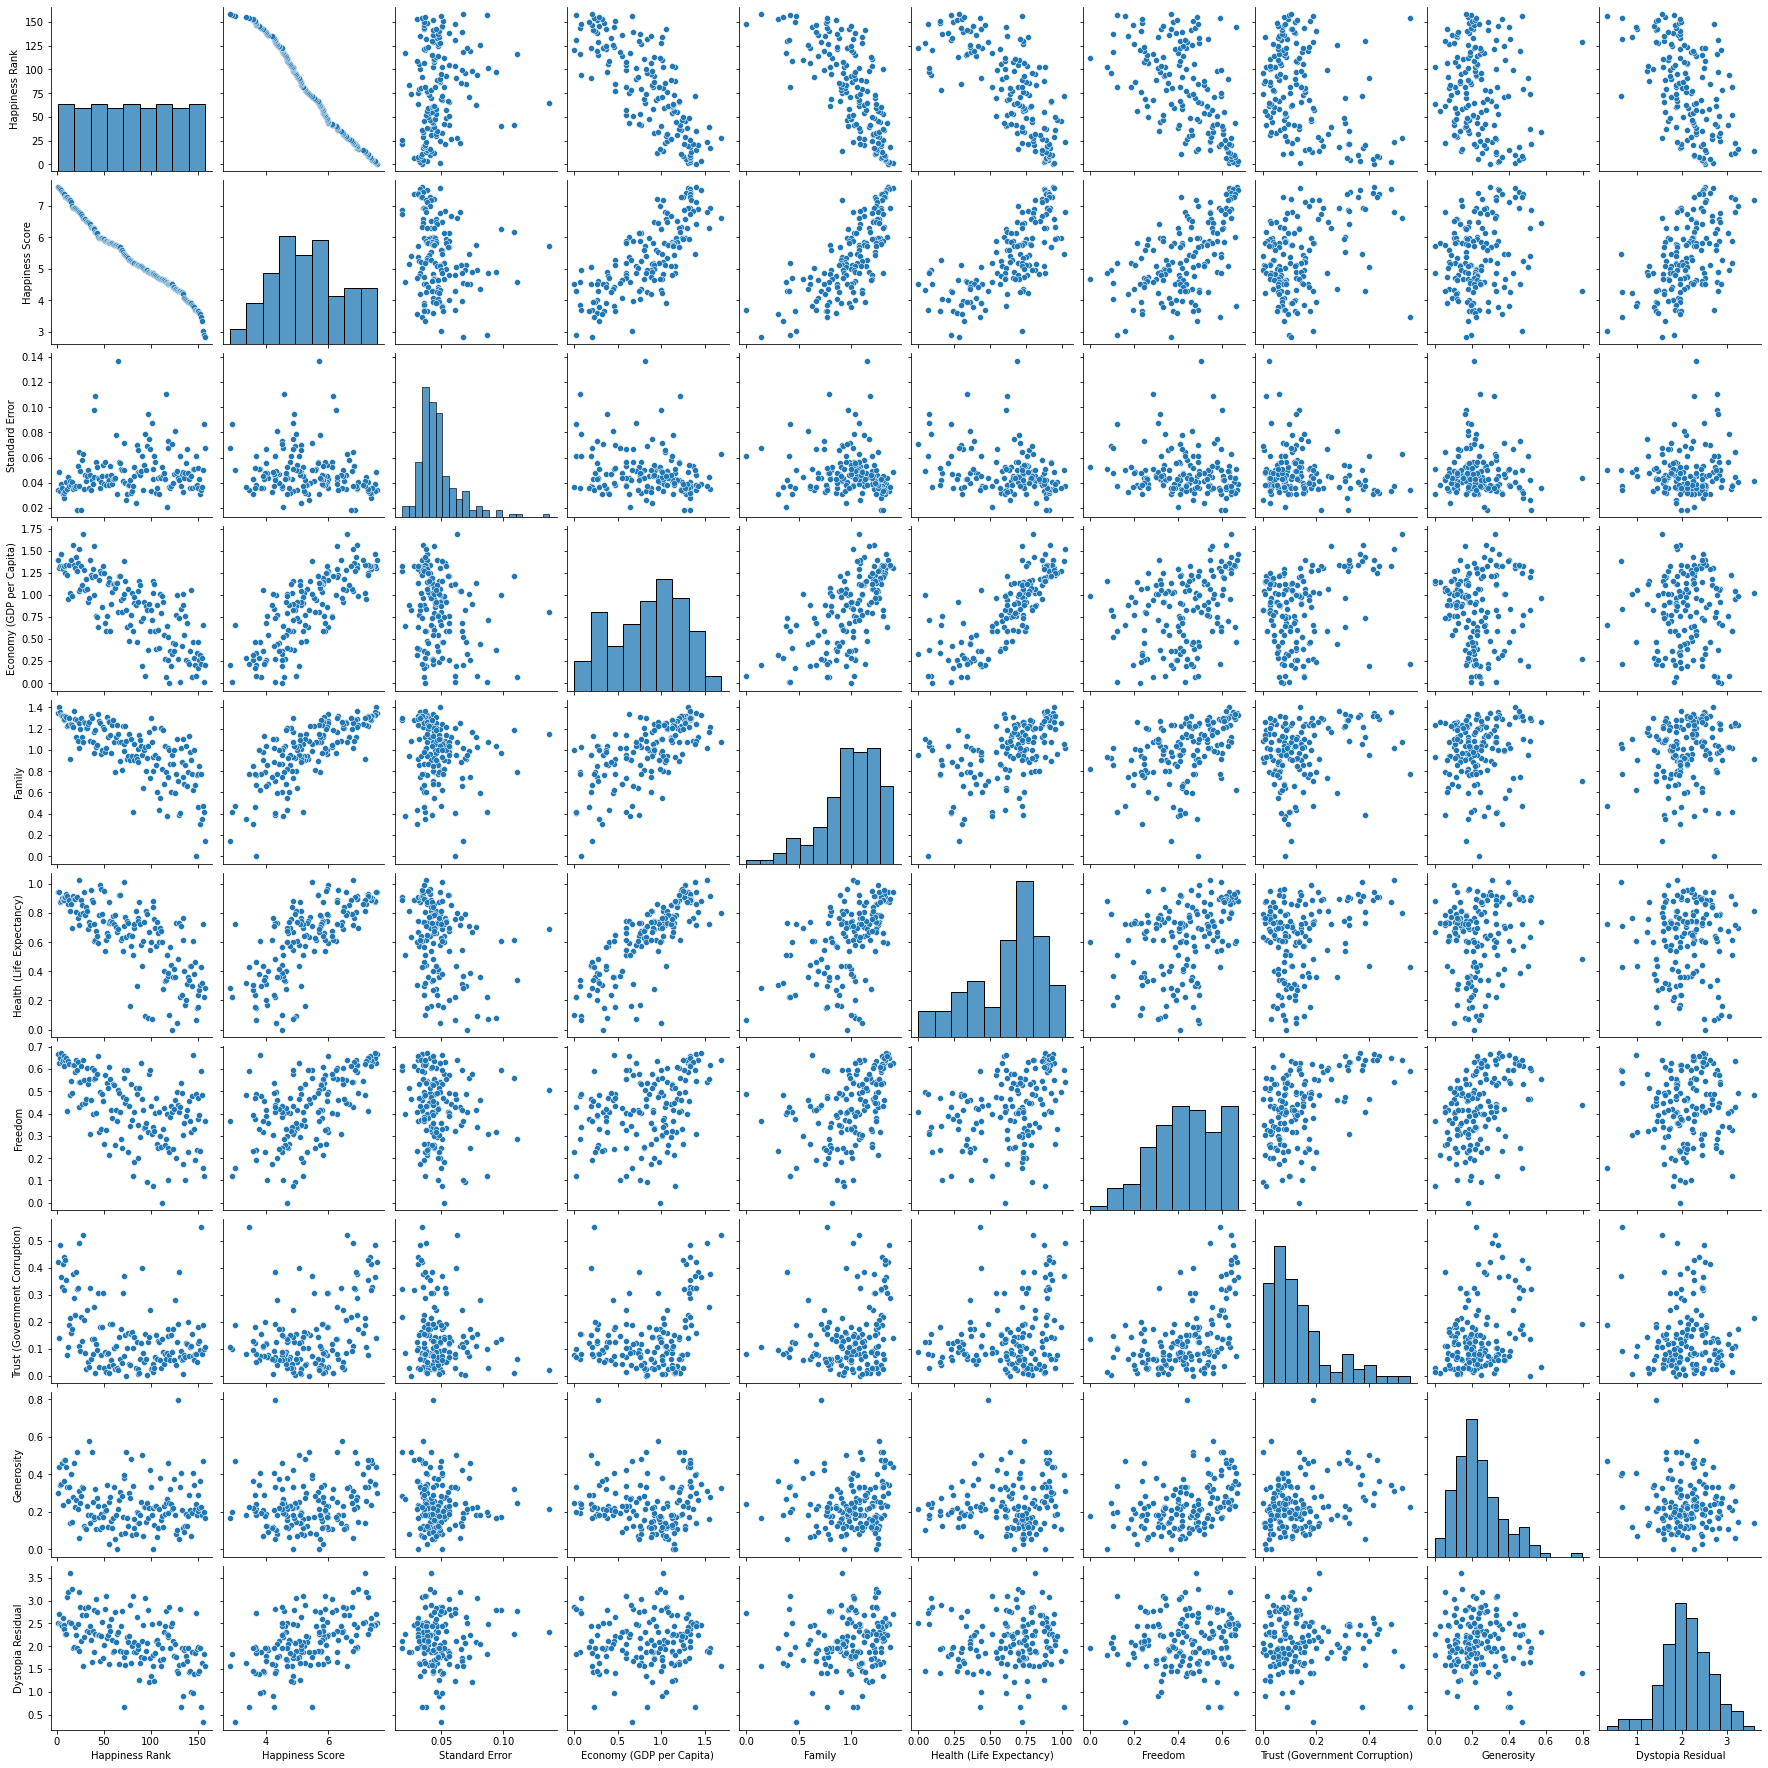

In [79]:
# pairplot to see correlation among the features and label

sns.pairplot(whr)

#### From the above pair plot we can observe that Happiness score has positive correlation with almost all the features except for a few, where it shows either no correlation or negative correlation

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

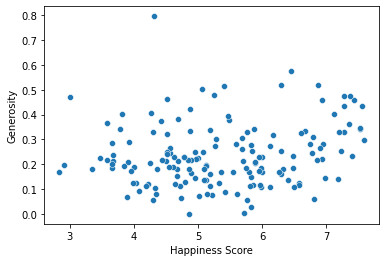

In [80]:
# scatter plot to find correlation between Generosity and Happiness Score.
sns.scatterplot(x='Happiness Score',y='Generosity', data = whr)

#### In the above scatterplot we find no correlation between Generosity and Happiness Score.

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

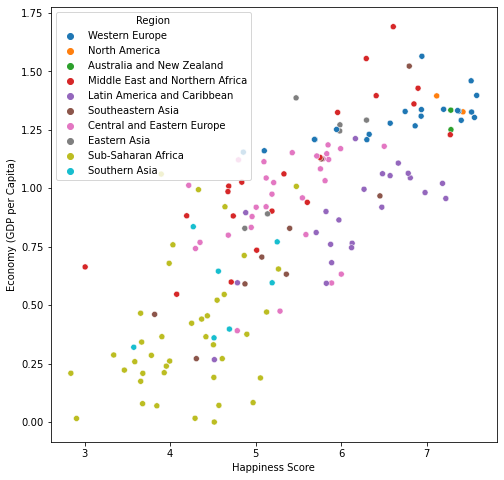

In [81]:
# scatter plot to find correlation between Happiness Score and Economy 

plt.figure(figsize = (8,8))
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=whr,hue='Region')

#### The above scatter plot shows that there is a positive correlation between Happiness Score and Economy (GDP per Capita) i.e. as the Economy of a country increases, Happiness score of that country also increases

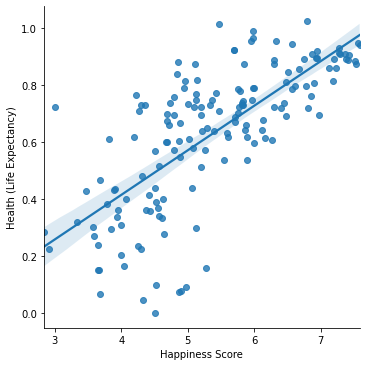

In [82]:
# scatter plot to find correlation between Health of people and Happiness Score
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=whr)

#### There is a positive correlation between Health of people and Happiness Score, also there are outliers present.

## Exploratory Data Analysis

In [83]:
#number of unique values

whr.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

#### Only Region seems to be a Discrete variable, all other are Continuous variable

In [84]:
# unique region names

whr.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

#### Above are the discrete variable names of the Region coloumn

In [85]:
percentage = whr['Region'].value_counts()/whr['Region'].value_counts().sum()*100
print('Percentage of the occurance of regions in Region Column: \n')

print(percentage)

Percentage of the occurance of regions in Region Column: 

Sub-Saharan Africa                 25.316456
Central and Eastern Europe         18.354430
Latin America and Caribbean        13.924051
Western Europe                     13.291139
Middle East and Northern Africa    12.658228
Southeastern Asia                   5.696203
Southern Asia                       4.430380
Eastern Asia                        3.797468
Australia and New Zealand           1.265823
North America                       1.265823
Name: Region, dtype: float64


#### Sub-Saharan Africa' and 'Central and Eastern Europe' region are frequently occuring while 'Australia and New Zealand' and 'North America' regions occur rarely.

In [86]:
# Statistics of data
whr.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### There is no missing value, since count of each value is 158. Data is symmetrically or normally distributed since mean and median are close to each other in all the columns. Each column has variance close to zero except for Happiness rank and Happiness score column. 

In [87]:
# unique country names
whr.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

#### Since the target column i.e "Happiness Score" is continuous the learning method is : Regression


### Label encoding

In [88]:

# import label encoder
from sklearn.preprocessing import LabelEncoder

#intialize label encoder
LE = LabelEncoder()

#change the categorical varaiables to numerical variables
whr["Country"] = LE.fit_transform(whr["Country"])
whr["Region"] = LE.fit_transform(whr["Region"])

In [89]:
whr.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [90]:
#check the skewness

whr.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

#### Standard Error,Family,Trust (Government Corruption),Generosity show skewness which is need to be dealt with.



In [91]:

#split dataset into indepedent and dependent variable

x = whr.drop("Happiness Score", axis = 1)
y = whr["Happiness Score"]

#check skewness
x.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [92]:
# removing  skewness using power transform

from sklearn.preprocessing import power_transform

#intialize
whr_new = power_transform(x)

#create the new dataframe
whr_new = pd.DataFrame(whr_new, columns = x.columns)

#check skewness
whr_new.skew()


Country                         -0.279791
Region                          -0.228041
Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

#### Skewness removed from the dataset

### Outlier check and removal 

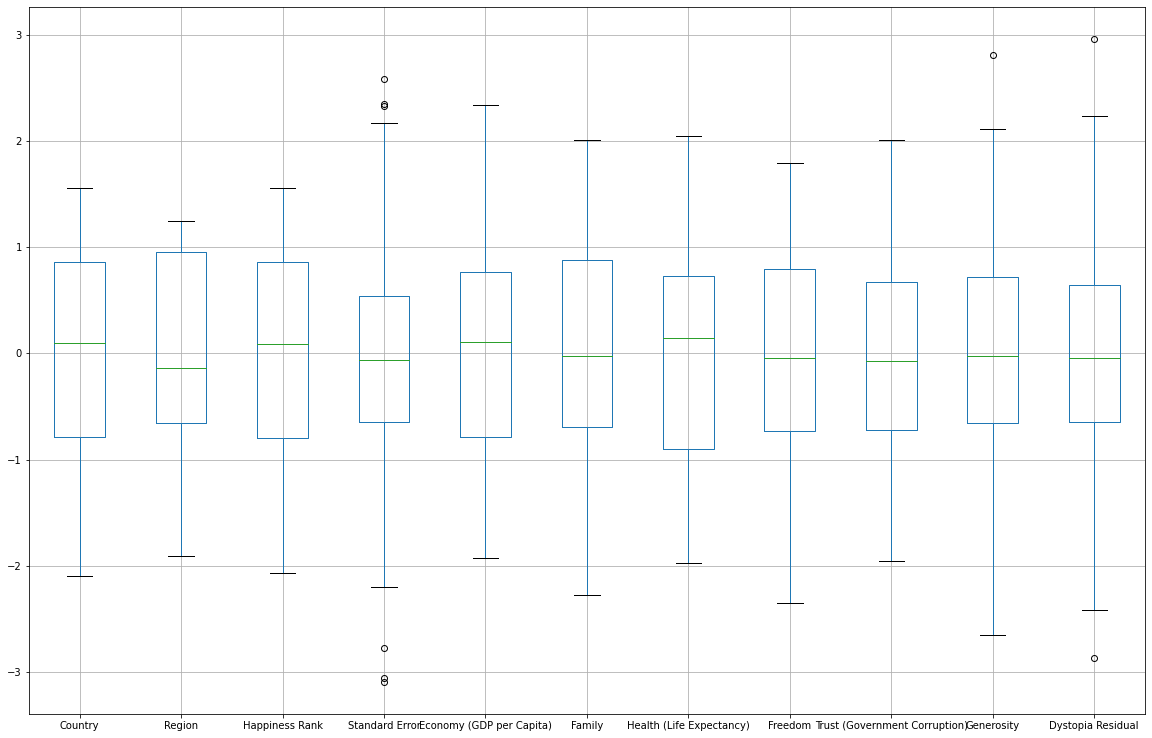

In [93]:
# plotin box plot for the attribute

x = whr_new
x.boxplot(figsize = [20,13])
plt.show()

#### From the above plot we can observe that there are outliers present in Standard error, Genorisity  and Dystopia Residual

<AxesSubplot:xlabel='Generosity'>

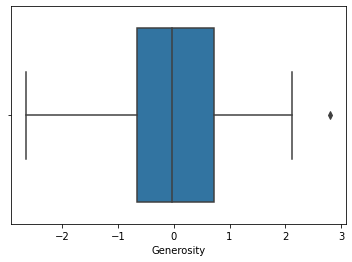

In [94]:
sns.boxplot(x = x["Generosity"])

<AxesSubplot:xlabel='Dystopia Residual'>

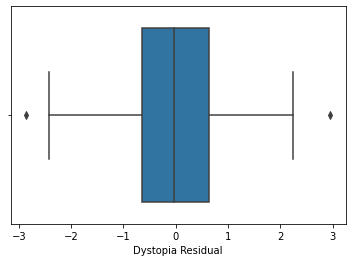

In [95]:
sns.boxplot(x = x["Dystopia Residual"])

<AxesSubplot:xlabel='Standard Error'>

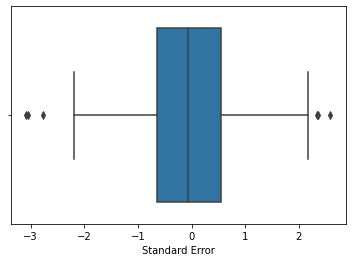

In [96]:
sns.boxplot(x = x["Standard Error"])

In [97]:
# z-score to find the outlier
from scipy import stats
import numpy as np

z= np.abs(stats.zscore(x))
print(z)

#define a thershold to identify the outlier
thershold = 3
print(np.where(z>3))

[[1.17106926 1.24453048 2.06341393 ... 1.77399061 0.62239051 0.75099154]
 [0.3443269  1.24453048 2.00849761 ... 0.31599326 1.48099498 1.11001108]
 [0.84509236 1.24453048 1.95857395 ... 1.90679207 0.92797276 0.70227525]
 ...
 [1.18876946 0.30300992 1.52535242 ... 0.73891461 1.65933595 2.86621557]
 [1.28332767 0.95510156 1.54254416 ... 0.15194624 0.19482942 0.51480136]
 [1.27672507 0.95510156 1.55970548 ... 0.06732623 0.49041465 0.97664547]]
(array([20, 25], dtype=int64), array([3, 3], dtype=int64))


In [98]:
x.shape

(158, 11)

In [99]:
print(z[20][3])
print(z[25][3])

3.0597710452647022
3.0901118134443086


In [100]:
x = x[(z<3).all(axis=1)]

In [101]:
x.shape

(156, 11)

In [102]:
y =y[(z<3).all(axis=1)]


In [103]:
y.shape

(156,)

#### Outliers Removed from the dataset

## Data Standardization

In [104]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x) #scaled


## Finding Best Random State

In [105]:
# finding best random state

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.9970010059337957  on Random State  115


#### The best random state is 115

## Finding the best algorithm:

In [106]:
# LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 30, random_state = 108)
LR = LinearRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(r2_score(y_test, predlr))
print('----------error-----------')
print("Mean absolute error: ", mean_absolute_error(y_test,predlr))
print("Mean squared error: ", mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predlr)))

0.9977625721303779
----------error-----------
Mean absolute error:  0.045720158781442824
Mean squared error:  0.003014148229871534
Root Mean Squared Error:  0.054901258909714756


In [107]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr = DTR.predict(x_test)
print(r2_score(y_test,preddtr))
print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,preddtr))
print("Mean squared error: ", mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preddtr)))

0.9969382743358189
error
Mean absolute error:  0.04146666666666658
Mean squared error:  0.004124599999999994
Root Mean Squared Error:  0.06422304882205448


In [108]:
#RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predrfr))
print("Mean squared error: ", mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predrfr)))


0.997989705881732
error
Mean absolute error:  0.032413333333332135
Mean squared error:  0.002708165273333258
Root Mean Squared Error:  0.05204003529335139


In [109]:
# AdaBoostRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

ada_reg = AdaBoostRegressor(n_estimators = 100)
print(ada_reg)
ada_reg.fit(x_train,y_train)
predada = ada_reg.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predada))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predada))
print("Mean squared error: ", mean_squared_error(y_test,predada))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predada)))

AdaBoostRegressor(n_estimators=100)
0.9977832925012101
error
Mean absolute error:  0.03851507885876293
Mean squared error:  0.00298623480753766
Root Mean Squared Error:  0.054646452835821466


In [110]:
# KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 5)
knnr.fit(x_train, y_train)
predknnr = knnr.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predknnr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predknnr))
print("Mean squared error: ", mean_squared_error(y_test,predknnr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predknnr)))

0.9288600180880457
error
Mean absolute error:  0.2624066666666667
Mean squared error:  0.09583614000000003
Root Mean Squared Error:  0.3095741268258703


### From all the above algorithms we can find that highest accuracy score belongs to adaboostregressor and Linear regression, nearby 100%. This may be a result of overfitting. So now, Let's consider the cross validation score to find better performance.

In [111]:
# cross validation score of Linear regression model

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr, x, y, cv = 5)
print("the cross validation score of Linear regression model :", scr.mean())


the cross validation score of Linear regression model : 0.7589142503692813


In [117]:
#cross validation score of Decision Tree regression model

from sklearn.model_selection import cross_val_score

scr = cross_val_score(dr, x, y, cv = 5)
print("the cross validation score of Decision Tree regression model :", scr.mean())


the cross validation score of Decision Tree regression model : -1.61895813907477


In [113]:
# cross validation score of Random Forest regression model

from sklearn.model_selection import cross_val_score

scr = cross_val_score(rfr, x, y, cv = 5)
print("the cross validation score of Random Forest regression model :", scr.mean())


the cross validation score of Random Forest regression model : -1.8683122544340267


In [114]:
# cross validation score of AdaBoost regressoin model

from sklearn.model_selection import cross_val_score

scr = cross_val_score(ada_reg, x, y, cv = 5)
print("the cross validation score of AdaBoost regressoin model :", scr.mean())



the cross validation score of AdaBoost regressoin model : -2.6489524781757865


In [115]:
#cross validation score of Knearestneighbour regression model

from sklearn.model_selection import cross_val_score

scr = cross_val_score(kn, x, y, cv = 5)
print("the cross validation score of Knearestneighbour regression model :", scr.mean())

the cross validation score of Knearestneighbour regression model : -5.1037781164734195


#### After calculating the difference between actual accuracy score and cross validation score. The decision tree regressor, Random forest regressor, Ada Boost Regressor has the best accuracy score of all.

## Hyper Parameter tuning

In [118]:
from sklearn.model_selection import RandomizedSearchCV

#creating parameters list to pass in Grid SearchCV

parameters = {'n_estimators': [50, 100],
              'learning_rate' : [0.01,0.05,0.1,0.3,1],
              'loss' : ['linear', 'square', 'exponential']
             }
    

In [119]:
RCV = RandomizedSearchCV(AdaBoostRegressor(), parameters, cv=3)

In [120]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [121]:
RCV.best_params_
#printing the best parameter found by GridSearchCV

{'n_estimators': 50, 'loss': 'square', 'learning_rate': 1}

In [122]:
RCV_pred = RCV.best_estimator_.predict(x_test)
r2_score(y_test, RCV_pred)

0.9958626017036246

## Save the model

In [124]:
import pickle

filename = 'Happy.pkl'
pickle.dump(DTR,open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([6.477, 3.678, 4.507, 6.298, 5.123, 5.89 , 5.828, 4.739, 5.194,
       7.2  , 5.477, 3.575, 7.427, 4.677, 5.948, 7.119, 3.989, 4.857,
       6.786, 5.605, 5.995, 6.611, 4.419, 5.123, 4.694, 3.904, 7.119,
       4.874, 7.522, 5.987])

In [126]:
# Conclusion

a = np.array(y_test)
predicted = np.array(predada)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,6.574,6.528579
1,3.681,3.654000
2,4.512,4.451053
3,6.295,6.293158
4,5.124,5.070526
5,5.889,5.905364
6,5.824,5.806875
7,4.800,4.841400
8,5.212,5.240818
9,7.284,7.363182
